In [49]:
#Crime Data Analysis of Chicago from the years 2001-2019 and analyzing the increase in crime rate and under which category
#4rt part
#Reading Cleaned Data Files from the year 2016 to 2019
import pandas as pd                                                                     #linear algebra
import numpy as np                                                                      #data processing
rd = pd.read_csv('C:/Users/jainv/OneDrive/Desktop/Big Data/project/2016-19.csv')        #rd is used to read data from csv files
rd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11227287,JB147188,10/8/2017 3:00,092XX S RACINE AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,2,NaN,NaN,2017,2/11/2018 15:57,NaN,NaN,NaN
1,11227583,JB147595,3/28/2017 14:00,026XX W 79TH ST,620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,5,NaN,NaN,2017,2/11/2018 15:57,NaN,NaN,NaN
2,11227293,JB147230,9/9/2017 20:17,060XX S EBERHART AVE,810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,6,NaN,NaN,2017,2/11/2018 15:57,NaN,NaN,NaN
3,11227634,JB147599,8/26/2017 10:00,001XX W RANDOLPH ST,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,2,NaN,NaN,2017,2/11/2018 15:57,NaN,NaN,NaN
4,11227508,JB146365,1/1/2017 0:01,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,12.0,30.0,2,NaN,NaN,2017,2/11/2018 15:57,NaN,NaN,NaN


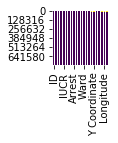

In [50]:
#Importing matplot library and seaborn for displaying graphs
import matplotlib.pyplot as plot
import seaborn as sea
plot.figure(figsize=(1,1))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')      #null values in dataset

In [51]:
#There are 22 columns in our CSV file out of which we are continuing in Descending order the type of crime in each category and its respective counts
rd = rd.dropna()
rd = rd.drop(['ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT                  178995
BATTERY                143299
CRIMINAL DAMAGE         83937
ASSAULT                 56166
DECEPTIVE PRACTICE      49009
OTHER OFFENSE           48739
NARCOTICS               36642
BURGLARY                36282
ROBBERY                 31636
MOTOR VEHICLE THEFT     30781
Name: Primary Type, dtype: int64

In [52]:
#describing Location of where crimes are committed the most in descending order
pd.value_counts(rd['Location Description'])[:10] #top 10 value counts available in terms of location and the type of Crime

STREET                            170270
RESIDENCE                         128112
APARTMENT                          96619
SIDEWALK                           62663
OTHER                              31525
PARKING LOT/GARAGE(NON.RESID.)     23055
SMALL RETAIL STORE                 18923
RESTAURANT                         18673
RESIDENTIAL YARD (FRONT/BACK)      15122
ALLEY                              14973
Name: Location Description, dtype: int64

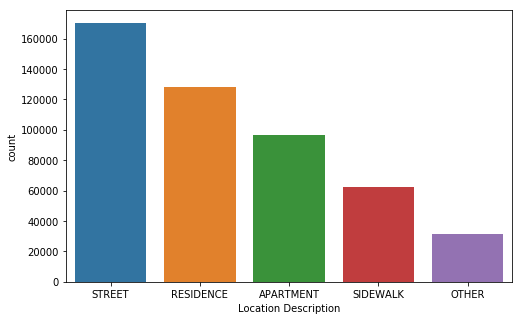

In [53]:
#plotting of the top 5 crimes
plot.figure(figsize = (8, 5)) #location description and semantics
sea.countplot(x= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:5].index)

In [54]:
#position of where the crimes are committed 
#importing cartoDb to show google maps in real time with areas of crime
#importing library folium for display of map
import folium
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB Positron")
locs = rd.groupby('Community Area').first()
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1.0,42.012652,-87.673666,OTHER,False
2.0,42.016919,-87.684345,STREET,False
3.0,41.955536,-87.656163,RESIDENTIAL YARD (FRONT/BACK),False
4.0,41.968075,-87.682403,STREET,False
5.0,41.961510,-87.675013,COMMERCIAL / BUSINESS OFFICE,False


In [55]:
#Indexing location with respective community
for i in range(len(new_locs)):
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = False).add_to(c_m)

In [56]:
c_m 

In [57]:
#Location of each crime and its unique location
uniq_locs = rd['Location'].value_counts()
uniq_locs.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.897895128, -87.624096605)', '(41.976290414, -87.905227221)',
       '(41.868541914, -87.639235361)', '(41.868180939, -87.709271389)',
       '(41.742710224, -87.634088181)', '(41.979006297, -87.906463155)',
       '(41.88171846, -87.627760426)', '(41.909664252, -87.742728815)',
       ...
       '(41.837802559, -87.668297476)', '(41.811281613, -87.708822579)',
       '(41.748664099, -87.654468308)', '(41.774006317, -87.733618439)',
       '(41.750889436, -87.556516464)', '(41.936343907, -87.728024006)',
       '(41.926711976, -87.735413155)', '(41.901988105, -87.709419836)',
       '(41.940798611, -87.801923494)', '(41.870054388, -87.656776178)'],
      dtype='object', length=254183)

In [58]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})  #A simple criminal rate index dataFrame
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",1423
1,"(41.754592961, -87.741528537)",812
2,"(41.897895128, -87.624096605)",804
3,"(41.976290414, -87.905227221)",746
4,"(41.868541914, -87.639235361)",659


In [59]:
#extraction of location whee each crime is committed
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [60]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor) 
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [61]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=11,
                        tiles="CartoDB Positron")                      # Total crime rate

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)
    

In [62]:
crime_map

In [63]:
rdt = rd[rd['Primary Type'] == 'THEFT'] #Closer look at thefts

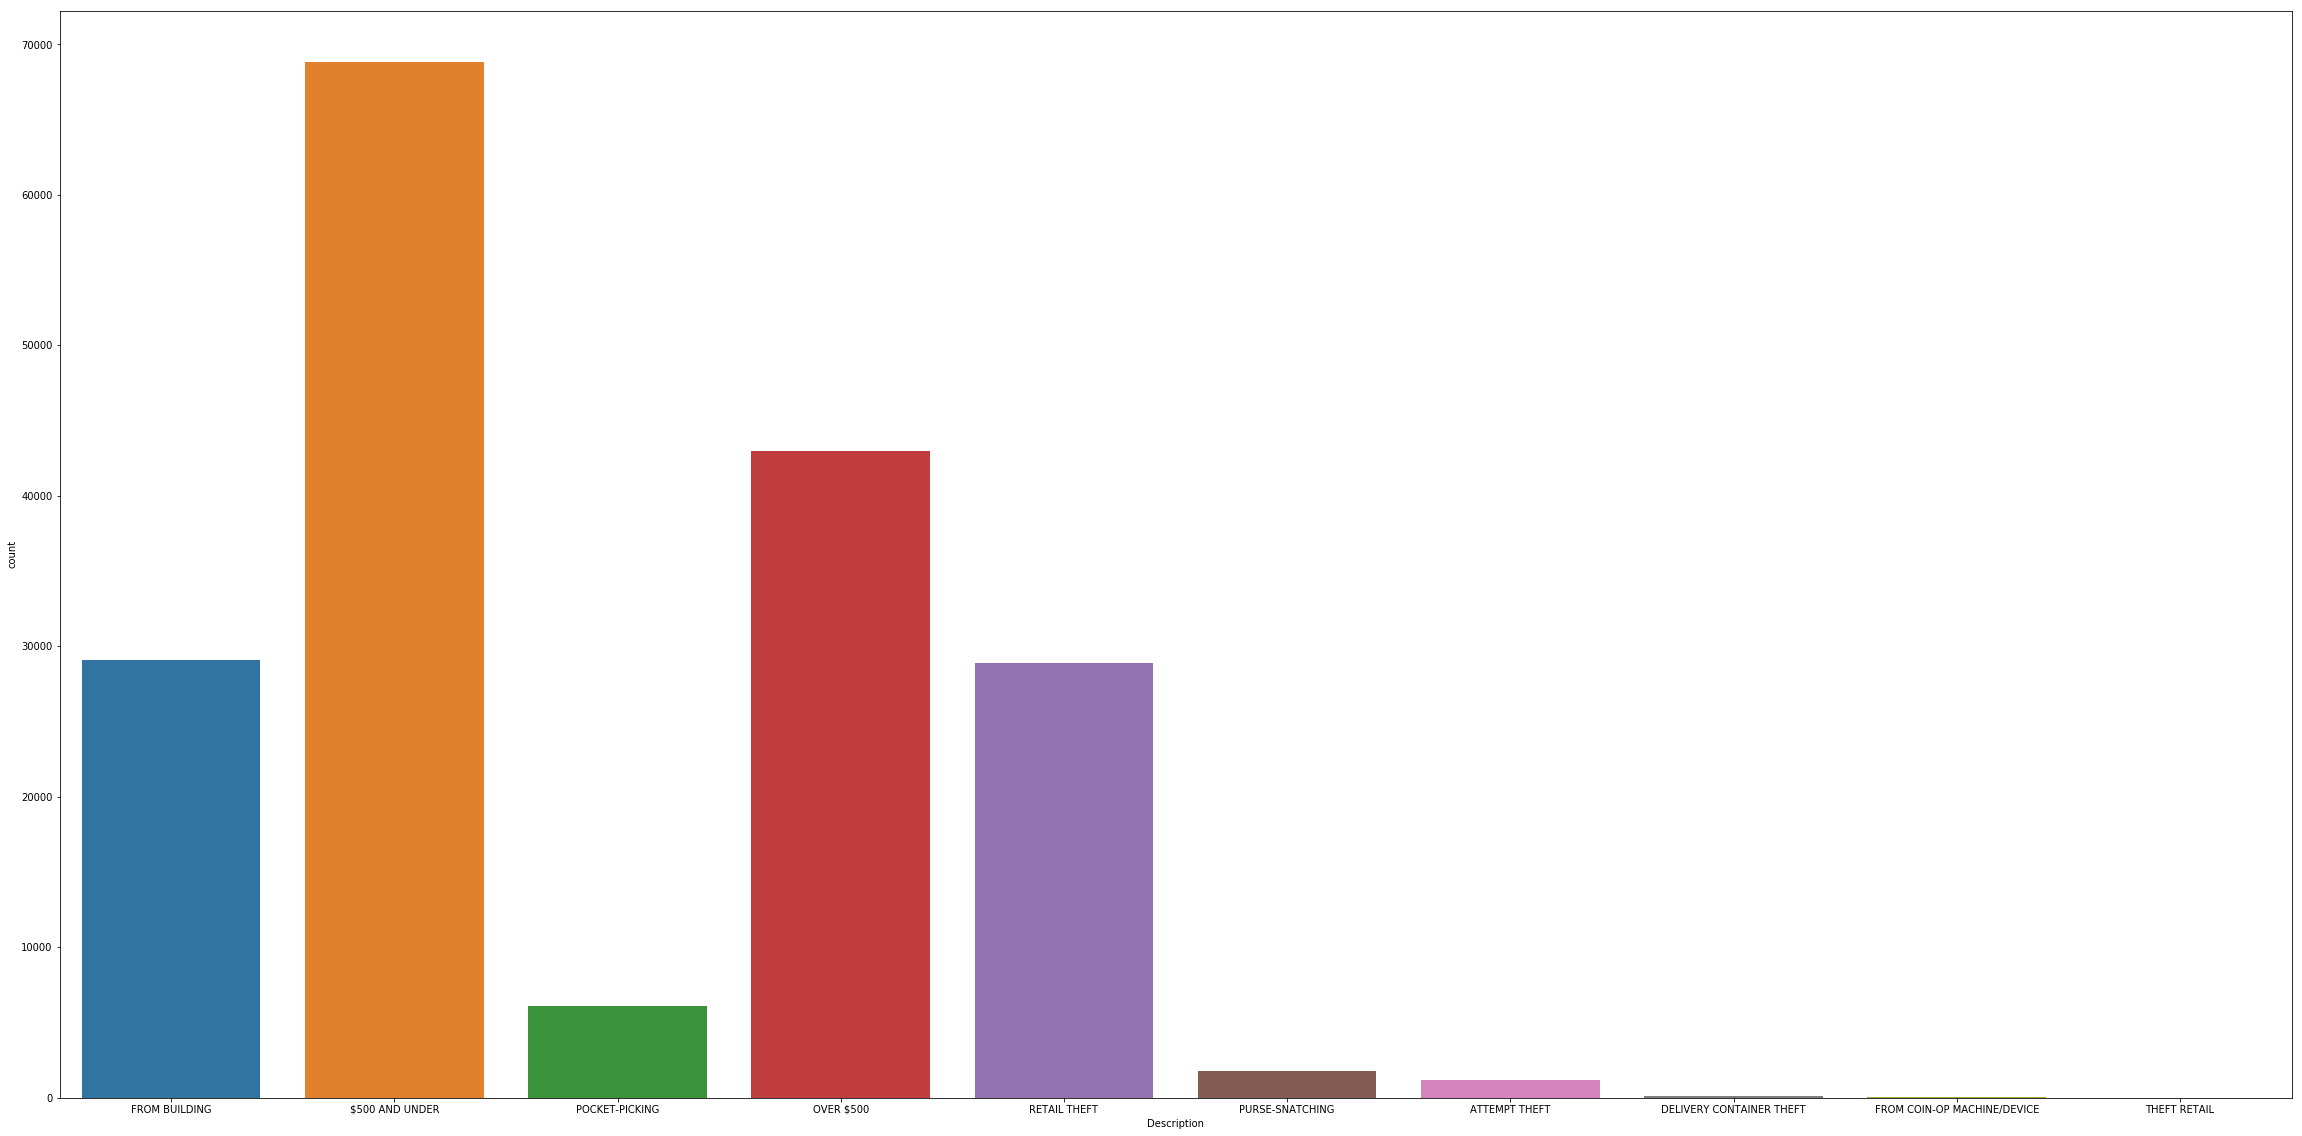

In [64]:
plot.figure(figsize = (40, 20))
sea.countplot(x = rdt['Description'])

In [65]:
#different types of thefts and its count
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1) #sorted array of counts
rdt_data.head()

,Counts,Description
0,68807,$500 AND UNDER
1,42971,OVER $500
2,29105,FROM BUILDING
3,28913,RETAIL THEFT
4,6090,POCKET-PICKING


In [66]:
#calculating thefts and its counts monthly in descending order
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [69]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [70]:
theft_in_months.head()

,thefts,month
7,17704.0,1
10,16568.0,2
8,18401.0,3
6,16608.0,4
5,16032.0,5


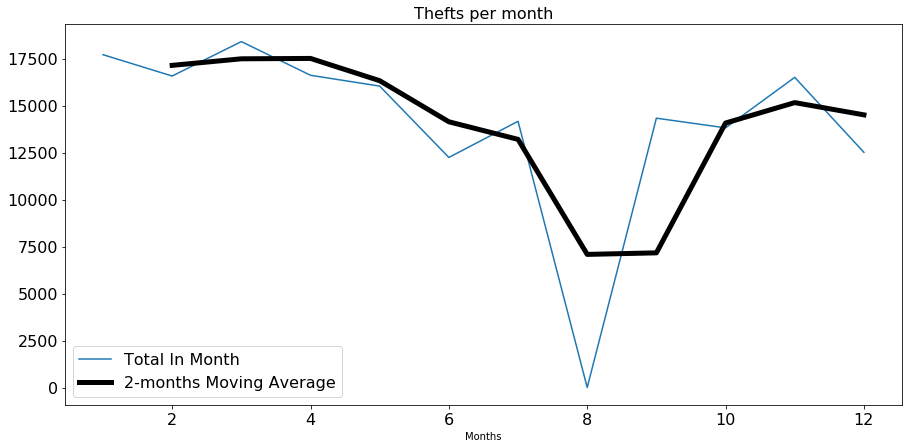

In [71]:
#plot of thefts and its average
plt.figure(figsize = (15,7))       #The monthly trend
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [72]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2019-11-14 23:50:00
2016-01-01 00:00:00


In [73]:
rdt['Date'].iloc[0].date()

datetime.date(2019, 5, 15)

In [74]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jainv\Anaconda3\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\jainv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\jainv\Anacon

In [75]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

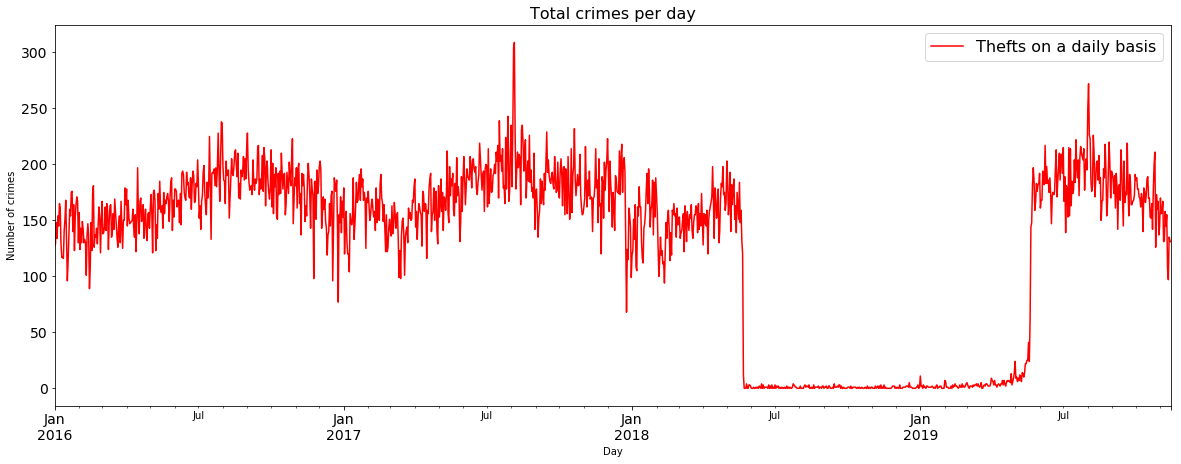

In [76]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [77]:
rdt = rd[rd['Primary Type'] == 'BATTERY']  #battery crimes

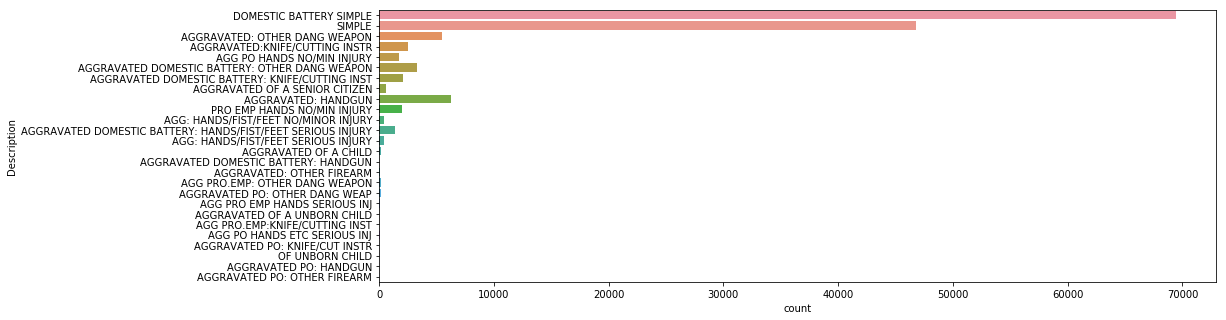

In [78]:
plot.figure(figsize = (15,5))
sea.countplot(y = rdt['Description'])

In [79]:
#different type of battery charges
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,69456,DOMESTIC BATTERY SIMPLE
1,46742,SIMPLE
2,6276,AGGRAVATED: HANDGUN
3,5444,AGGRAVATED: OTHER DANG WEAPON
4,3268,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON


In [80]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
battery_in_months = pd.DataFrame({"Battery" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [83]:
battery_in_months.fillna(0, inplace=True)
battery_in_months = battery_in_months.sort_values(['month'], ascending=[1]) #battery per month

In [84]:
battery_in_months.head()

,Battery,month
8,13573.0,1
9,13031.0,2
6,14254.0,3
7,14263.0,4
0,0.0,5


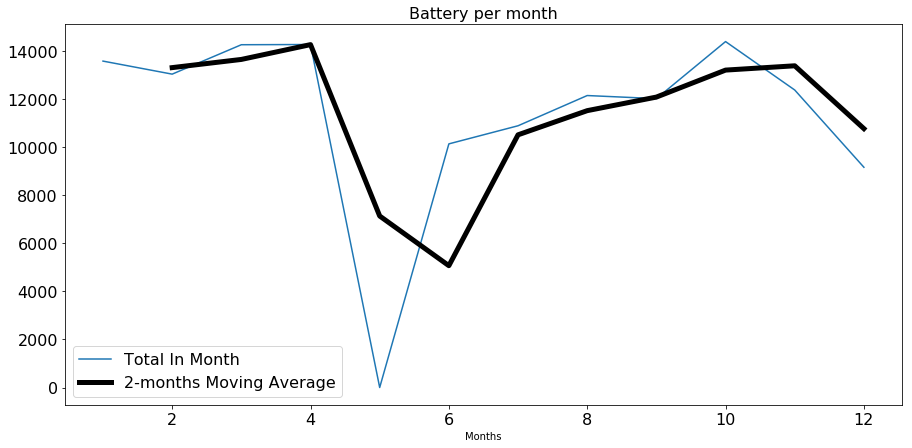

In [85]:
plt.figure(figsize = (15,7))
plt.plot(battery_in_months['month'],battery_in_months['Battery'], label = 'Total In Month')
plt.plot(battery_in_months['month'],battery_in_months['Battery'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Battery per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [86]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2019-11-14 23:45:00
2016-01-01 00:01:00


In [87]:
rdt['Date'].iloc[0].date()

datetime.date(2019, 4, 25)

In [88]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

C:\Users\jainv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jainv\Anaconda3\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\jainv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\jainv\Anacon

In [89]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

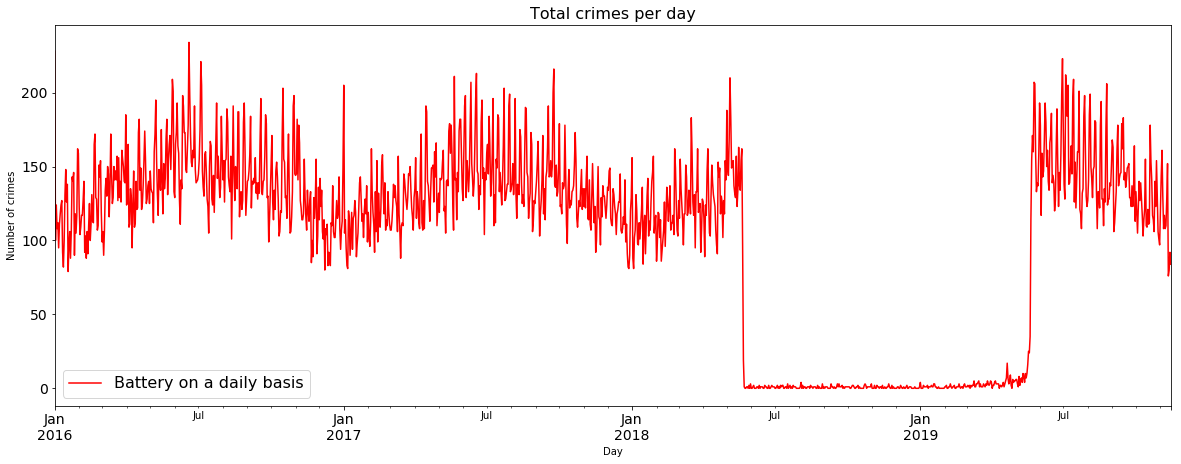

In [90]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Battery on a daily basis", color = 'red')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [91]:
rdt = rd[rd['Primary Type'] == 'HOMICIDE']  #homicide crimes 

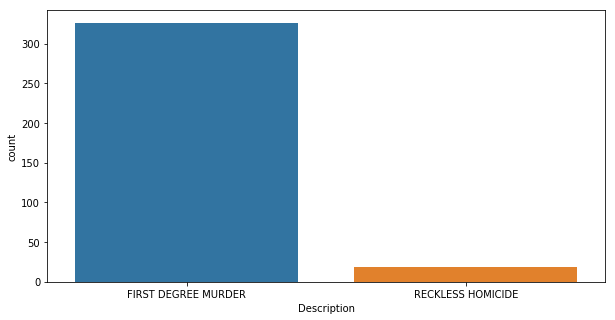

In [92]:
plot.figure(figsize = (10,5))
sea.countplot(x = rdt['Description'])

In [93]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,326,FIRST DEGREE MURDER
1,19,RECKLESS HOMICIDE


In [94]:
rdt = rd[rd['Primary Type'] == 'DECEPTIVE PRACTICE'] #other types of crime

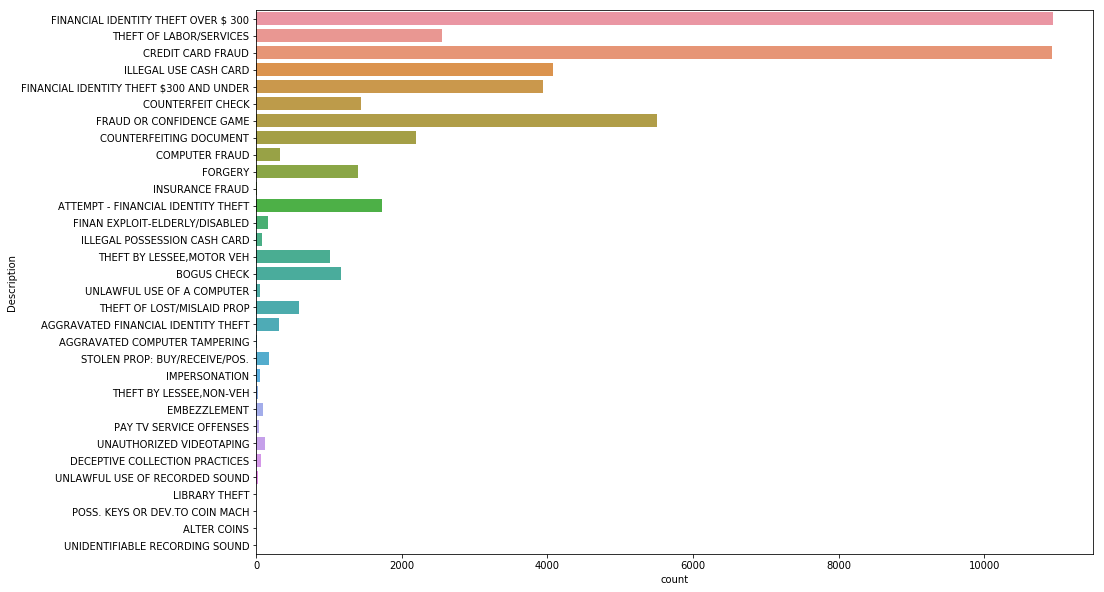

In [95]:
plot.figure(figsize = (15,10))
sea.countplot(y = rdt['Description'])

In [96]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1) #sorting the counts
rdt_data.head()

,Counts,Description
0,10952,FINANCIAL IDENTITY THEFT OVER $ 300
1,10934,CREDIT CARD FRAUD
2,5508,FRAUD OR CONFIDENCE GAME
3,4081,ILLEGAL USE CASH CARD
4,3941,FINANCIAL IDENTITY THEFT $300 AND UNDER


In [98]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/9/2019 9:00
1/1/2016 0:00


In [99]:
rdt = rd[rd['Primary Type'] == 'CRIM SEXUAL ASSAULT'] #sexual assault

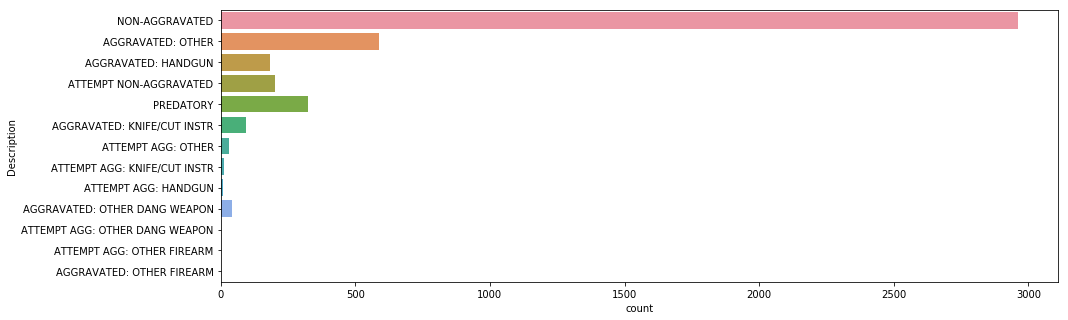

In [100]:
plot.figure(figsize = (15,5))
sea.countplot(y = rdt['Description'])

In [101]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1) #sorting the counts
rdt_data.head()

,Counts,Description
0,2960,NON-AGGRAVATED
1,590,AGGRAVATED: OTHER
2,323,PREDATORY
3,201,ATTEMPT NON-AGGRAVATED
4,185,AGGRAVATED: HANDGUN


In [102]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/9/2019 9:30
1/1/2016 0:00
